In [ ]:
import pandas as pd
from IPython.display import display

In [3]:
base_path = './합본'
years = ['/22', '/23']
regions = ['/수도권', '/동부', '/서부', '/제주산간']
csv_types = ['/TL_csv/', '/VL_csv/']

file_names = ['tn_visit_area_info_방문지정보', 'tn_traveller_master_여행객 Master', 'tn_travel_여행', 'tn_tour_photo_관광사진',
            'tn_mvmn_consume_his_이동수단소비내역', 'tn_move_his_이동내역', 'tn_lodge_consume_his_숙박소비내역', 'tn_companion_info_동반자정보',
             'tn_adv_consume_his_사전소비내역', 'tn_activity_his_활동내역', 'tn_activity_consume_his_활동소비내역' ]

year_region_codes = {
    '/22': ['_A', '_B', '_C', '_D'],  # 22년도 수도권 A, 동부 B, 서부 C, 제주산간 D
    '/23': ['_E', '_F', '_G', '_H']   # 23년도 수도권 E, 동부 F, 서부 G, 제주산간 H
}

m_df =[]
year = '/23'

for file_name in file_names:
    dfs = []
    for region, code in zip(regions, year_region_codes[year]):
        for csv_type in csv_types:
            file_path = f"{base_path}{year}{region}{csv_type}{file_name}{code}.csv"
            df = pd.read_csv(file_path)
            dfs.append(df)
    mdf = pd.concat(dfs)
    m_df.append(mdf)
m_df_dict = {file_name: df for file_name, df in zip(file_names, m_df)} 

In [ ]:
lodging_type_mapping = {
    1: "호텔",
    2: "모텔 / 여관",
    3: "펜션",
    4: "리조트 / 콘도",
    5: "야영장",
    6: "전통가옥 숙박시설",
    7: "게스트하우스",
    8: "민박(단독주택 숙박)",
    9: "휴양림",
    10: "개인숙소(친구, 지인 집) 및 게스트하우스 혼합",
    11: "게스트하우스, 에어비앤비 위주"
}

In [11]:
lodgings = pd.read_csv('test.csv', encoding='utf-8')

In [13]:
lodgings.count()

Unnamed: 0                   7482
TRAVEL_ID                    7482
LODGING_NM                   7482
LODGING_PAYMENT_SEQ          7482
LODGING_TYPE_CD              7482
RSVT_YN                      7482
CHK_IN_DT_MIN                   0
CHK_OUT_DT_MIN                  0
PAYMENT_NUM                  7482
BRNO                            0
STORE_NM                     4267
ROAD_NM_ADDR                 6558
LOTNO_ADDR                   5198
ROAD_NM_CD                   3505
LOTNO_CD                     3505
PAYMENT_DT                   4228
PAYMENT_MTHD_SE              7482
PAYMENT_AMT_WON              7481
PAYMENT_ETC                  3789
TRAVEL_NM                    7482
TRAVELER_ID                  7482
TRAVEL_PURPOSE               7482
TRAVEL_START_YMD             7482
TRAVEL_END_YMD               7482
MVMN_NM                      7430
TRAVEL_PERSONA               7482
TRAVEL_MISSION               7482
TRAVEL_MISSION_CHECK         7482
GENDER                       7482
AGE_GRP       

In [6]:
lodgings.drop(['CHK_IN_DT_MIN', 'CHK_OUT_DT_MIN', 'BRNO'], axis=1, inplace=True)

In [14]:
lodgings['TRAVEL_STATUS_ACCOMPANY']

0          부모 동반 여행
1            나홀로 여행
2       2인 여행(가족 외)
3          2인 가족 여행
4       2인 여행(가족 외)
           ...     
7477         나홀로 여행
7478         나홀로 여행
7479    2인 여행(가족 외)
7480    2인 여행(가족 외)
7481       자녀 동반 여행
Name: TRAVEL_STATUS_ACCOMPANY, Length: 7482, dtype: object

In [31]:
# Group the data by AGE_GRP, TRAVEL_STATUS_ACCOMPANY, and LODGING_TYPE_CD, then count the occurrences
grouped_data = lodgings.groupby(['TRAVEL_STATUS_ACCOMPANY', 'MVMN_NM', 'LODGING_TYPE_CD']).size().reset_index(name='count')

display(grouped_data)

,TRAVEL_STATUS_ACCOMPANY,MVMN_NM,LODGING_TYPE_CD,count
0,2인 가족 여행,대중교통 등,1,160
1,2인 가족 여행,대중교통 등,2,23
2,2인 가족 여행,대중교통 등,3,21
3,2인 가족 여행,대중교통 등,4,14
4,2인 가족 여행,대중교통 등,5,1
...,...,...,...,...
149,자녀 동반 여행,자가용,7,9
150,자녀 동반 여행,자가용,8,13
151,자녀 동반 여행,자가용,9,57
152,자녀 동반 여행,자가용,10,7


In [33]:
grouped_data['normalized_count'] = grouped_data.groupby('TRAVEL_STATUS_ACCOMPANY',group_keys=False)['count'].apply(lambda x: x / x.sum())

display(grouped_data)

,TRAVEL_STATUS_ACCOMPANY,MVMN_NM,LODGING_TYPE_CD,count,normalized_count
0,2인 가족 여행,대중교통 등,1,160,0.225035
1,2인 가족 여행,대중교통 등,2,23,0.032349
2,2인 가족 여행,대중교통 등,3,21,0.029536
3,2인 가족 여행,대중교통 등,4,14,0.019691
4,2인 가족 여행,대중교통 등,5,1,0.001406
...,...,...,...,...,...
149,자녀 동반 여행,자가용,7,9,0.007634
150,자녀 동반 여행,자가용,8,13,0.011026
151,자녀 동반 여행,자가용,9,57,0.048346
152,자녀 동반 여행,자가용,10,7,0.005937


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontprop = fm.FontProperties(fname='./SOYO Maple Bold.ttf')

# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Re-plot the scatter plot with Korean font settings
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.scatterplot(
    data=lodgings,
    x='AGE_GRP',
    y='LODGING_TYPE_CD',
    hue='TRAVEL_STATUS_ACCOMPANY',
    palette='viridis',
    s=100,  # size of the points
    edgecolor='black'
)

# Add labels and title in Korean
plt.xlabel('연령대')
plt.ylabel('숙박 유형 코드')
plt.title('연령대와 동반 여행 상태에 따른 숙박 유형 코드 산점도')

# Display legend and layout
plt.legend(title='동반 여행 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

,TRAVEL_STATUS_ACCOMPANY,LODGING_TYPE_CD,count,normalized_count
0,2인 가족 여행,1,354,0.122364
1,2인 가족 여행,2,89,0.128799
2,2인 가족 여행,3,96,0.071803
3,2인 가족 여행,4,46,0.059974
4,2인 가족 여행,5,37,0.090024
...,...,...,...,...
77,자녀 동반 여행,7,12,0.020339
78,자녀 동반 여행,8,19,0.107345
79,자녀 동반 여행,9,59,0.424460
80,자녀 동반 여행,10,9,0.138462


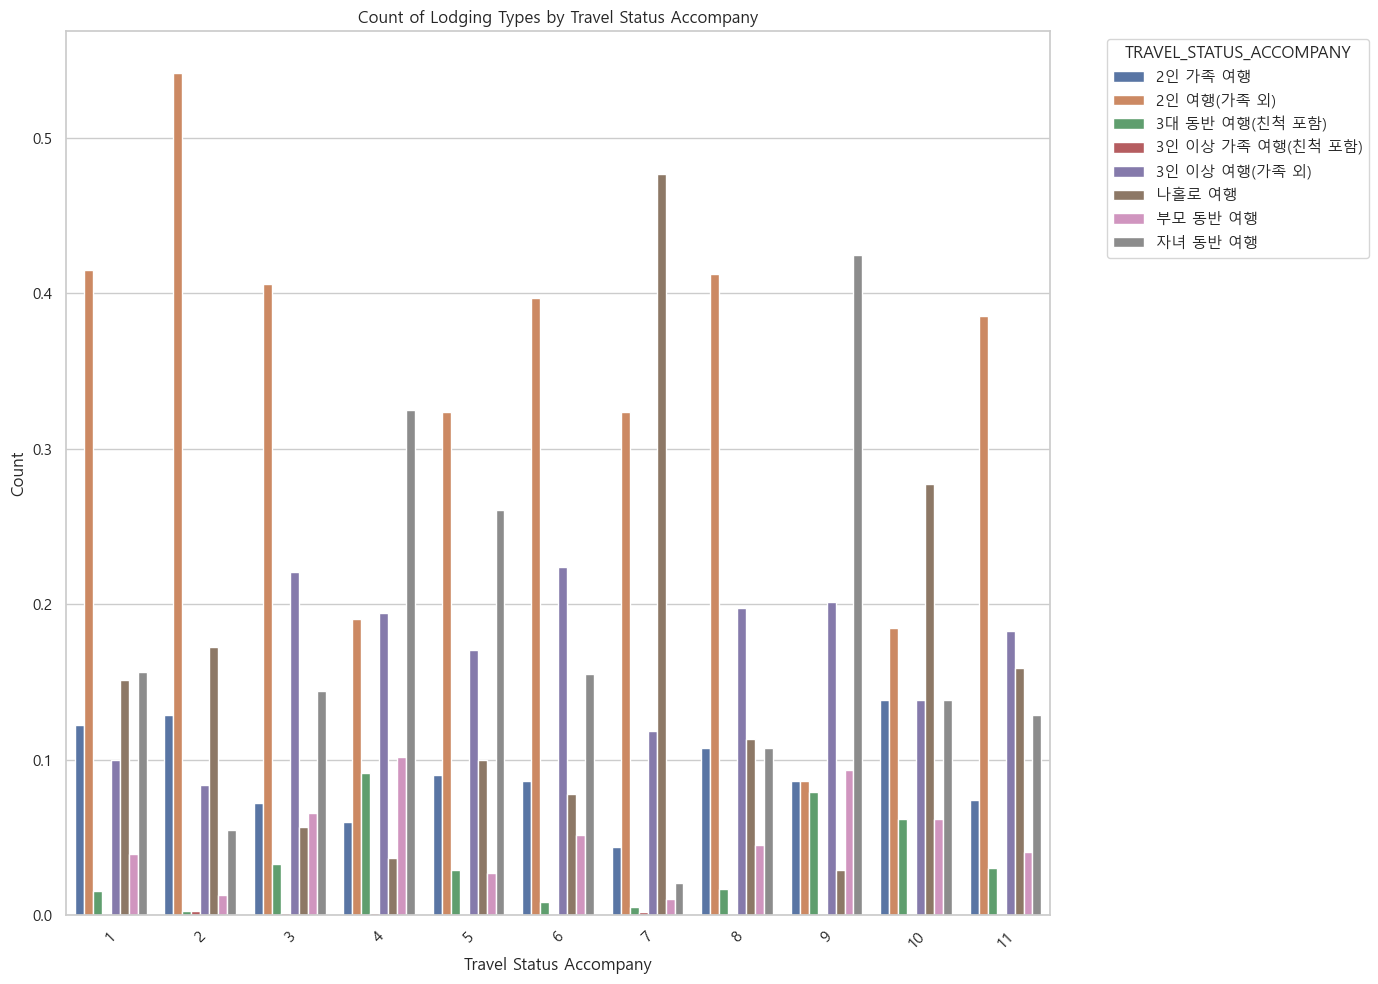

In [38]:
# Group the data by AGE_GRP, TRAVEL_STATUS_ACCOMPANY, and LODGING_TYPE_CD, then count the occurrences
grouped_data = lodgings.groupby(['TRAVEL_STATUS_ACCOMPANY', 'LODGING_TYPE_CD']).size().reset_index(name='count')

grouped_data['normalized_count'] = grouped_data.groupby('LODGING_TYPE_CD',group_keys=False)['count'].apply(lambda x: x / x.sum())

# Display the grouped data for verification
from IPython.display import display
display(grouped_data)

# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Plotting the grouped data to visualize the count of each combination
plt.figure(figsize=(14, 10))
sns.barplot(
    data=grouped_data,
    x='LODGING_TYPE_CD',
    y='normalized_count',
    hue='TRAVEL_STATUS_ACCOMPANY',
    dodge=True
)

# Set plot labels and title
plt.xlabel('Travel Status Accompany')
plt.ylabel('Count')
plt.title('Count of Lodging Types by Travel Status Accompany')
plt.legend(title='TRAVEL_STATUS_ACCOMPANY', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,AGE_GRP,TRAVEL_STATUS_ACCOMPANY,LODGING_TYPE_CD,count
0,20,2인 가족 여행,1,80
1,20,2인 가족 여행,2,11
2,20,2인 가족 여행,3,13
3,20,2인 가족 여행,4,6
4,20,2인 가족 여행,5,4
...,...,...,...,...
314,60,자녀 동반 여행,4,5
315,60,자녀 동반 여행,5,2
316,60,자녀 동반 여행,6,1
317,60,자녀 동반 여행,9,3


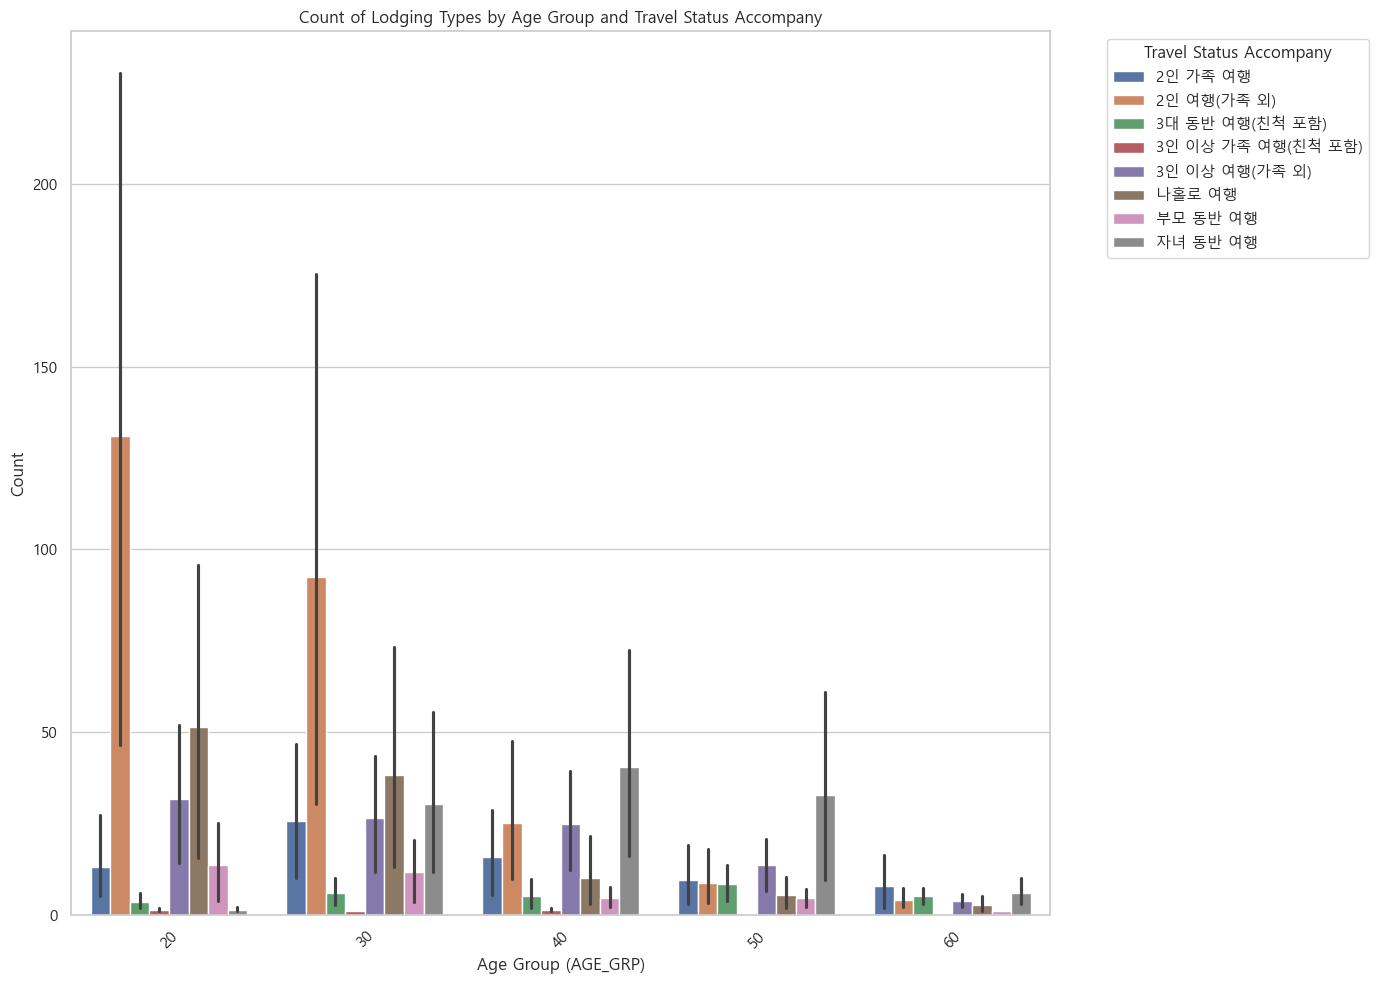

In [ ]:
# Group the data by AGE_GRP, TRAVEL_STATUS_ACCOMPANY, and LODGING_TYPE_CD, then count the occurrences
grouped_data = lodgings.groupby(['AGE_GRP', 'TRAVEL_STATUS_ACCOMPANY', 'LODGING_TYPE_CD']).size().reset_index(name='count')

# Display the grouped data for verification
display(grouped_data)

grouped_by_age = grouped_data.groupby('AGE_GRP')

# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Plotting the grouped data to visualize the count of each combination
plt.figure(figsize=(14, 10))
sns.barplot(
    data=grouped_data,
    x='AGE_GRP',
    y='percent',
    hue='TRAVEL_STATUS_ACCOMPANY',
    dodge=True
)

# Set plot labels and title
plt.xlabel('Age Group (AGE_GRP)')
plt.ylabel('Count')
plt.title('Count of Lodging Types by Age Group and Travel Status Accompany')
plt.legend(title='Travel Status Accompany', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()